<div style="text-align: center; background-color: #f0f0f0; padding: 15px;">
    <h1 style="color: #333;">The Effects of Greenhouse Gas Emissions on Earth's Temperature </h1>
    <h2 style="color: #666;">PROG74010 - Data Visualization Course Project</h2>
    <h3 style="color: #999;">Group 4: Jonathan Denoon, Matthew Persaud, Colin Smith</h3>
    <h4 style="color: #aaa;">April 11, 2024</h4>
</div>

<a id = '0'></a>
<h2>Table of Contents</h2>

* [Phase 1: Problem Definition, Data Collection, and Data Preparation](#1.0)
    * [Problem Definition](#1.a)
    * [Data Collection](#1.b)
    * [Data Preparation(Missing Values)](#1.c)

* [Phase 2: Exploratory Data Analysis](#2.0)
    * [Data Preparation(Outliers)](#2.a)
    * [...](#2.b)
    * [...](#2.c)

<a id='1.0'></a>
<h2>Phase 1: Problem Definition, Data Collection, and Data Preparation</h2>
    
<p>In Phase 1, the problem definition and datasets are discussed, as well as the conduction of data preparation, to appropriately clean and prepare the data for the analysis.</p>    

<a id='1.a'></a>
<h3>Problem Definition</h3>

<p>With the rise in global temperatures across Earth, the importance in understanding the underlying causes of these rises has become increasingly crucial for studying and monitoring Earth's climate and maintainability. Among the significant contributors to these temperature rises, is emission of greenhouse gases.

This notebook aims to analyze and visualize trends, patterns, and relationships among greenhouse gas emissions and Earth's temperature. The analysis and visualization of this data will provide useful insights to help understand the impact of greenhouse gases on global warming.</p> 

<a id='1.b'></a>
<h3>Data Collection</h3>

To perform the analysis of greenhouse gas emissions and global temperatures over time, two datasets are going to be used, and loaded into DataFrames:

**International Greenhouse Gas Emissions**

The first dataset that will be used is "The Greenhouse Gas (GHG) Inventory Data". This data includes information on various different greenhouse gases emitted per a specefic time and country. The data started its recordings in 1990, and records are developed by Parties to the Convention using scientific and methodological guidance from the Intergovernmental Panel on Climate Change (IPCC). As the data is developped with reference from a climate change governmental party, biases within the data may exits, including exagerated values or missing variables of importance. 

United Nations, & Dane, S. (2017, March 23). International Greenhouse Gas Emissions. Kaggle. https://www.kaggle.com/datasets/unitednations/international-greenhouse-gas-emissions/data


**Climate Change: Earth Surface Temperature Data**

The second dataset that will be used is the "Earth Surface Temperature Data". This data includes records for the average surface temperature on different places across earth, across different dates and times. The data was originally retrieved with mercury thermometers, with records from as far as the 1700's, though with the construction of airports, weather stations exists all over the place, and data is retreived and measured with more modernized approaches and technologies. There does not seem to be obvious bias within the data or how it was collected.

Berkeley Earth, Kaggle Team, & Sissener, K. (2017). Climate Change: Earth Surface Temperature Data. Kaggle.
https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

**Loading the Datasets**

We will load both datasets into two seperate DataFrames using the "pandas" library. The DataFrame records are then printed across all columns.

In [1]:
# Importing the necessary library
import pandas as pd

# Loading the "GlobalLandTemperaturesByMajorCity.csv" file into a DataFrame (df_temperature) (Dataset is in same folder as notebook)
df_temperature = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

# Print all data in all columns of the DataFrame
print("GlobalLandTemperaturesByMajorCity.csv/df_temperature\n")
print(df_temperature)

# Loading the "greenhouse_gas_inventory_data_data.csv" file into a DataFrame (df_gas) (Dataset is in same folder as notebook)
df_gas = pd.read_csv("greenhouse_gas_inventory_data_data.csv")

# Print all data in all columns of the DataFrame
print("greenhouse_gas_inventory_data_data.csv/df_gas\n")
print(df_gas)

GlobalLandTemperaturesByMajorCity.csv/df_temperature

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   
239176  2013-09-01                 NaN                            NaN   

           City        Country Latitude Longitude  
0       Abidjan  

<a id='1.c'></a>
<h3>Data Preparation(Missing Values)</h3>

To appropriately handle missing values, the data must be understood. To analyze data relationships showing trends over time, all data with missing date values must be dropped, as the dates within the datasets are not sorted in an ascending or descending fashion. To analyze data and draw insights based off of location, all records with missing countries must be dropped. To analyze gas category data, all missing gas types must be dropped, as it is categorical data and can not be imputed due to missing sort. 

Furthermore, analysis's that rely on temperature and/or amount of gas, missing values must be dealt with through imputation. 

**Missing Values**

To determine missing values, the sums of the required columns per each DataFrame are counted.

In [2]:
# Create variables for count to store sum of all null (missing) records in important columns amongst temperature data
missing_AverageTemperature_count = df_temperature['AverageTemperature'].isnull().sum()
missing_tDate_count = df_temperature['dt'].isnull().sum()
missing_tCountry_count = df_temperature['Country'].isnull().sum()

# Create variables for count to store sum of all null (missing) records in important columns amongst greenhouse gas data

missing_gCountry_count = df_gas['country_or_area'].isnull().sum()
missing_gDate_count = df_gas['year'].isnull().sum()
missing_gType_count = df_gas['category'].isnull().sum()
missing_gAmount_count = df_gas['value'].isnull().sum()

# Print count of missing values
print("Missing values in temperature data:")
print("AverageTemperature:", missing_AverageTemperature_count)
print("Date:", missing_tDate_count)
print("Country:", missing_tCountry_count)

print("\nMissing values in greenhouse gas data:")
print("Country:", missing_gCountry_count)
print("Year:", missing_gDate_count)
print("Category:", missing_gType_count)
print("Value:", missing_gAmount_count)


Missing values in temperature data:
AverageTemperature: 11002
Date: 0
Country: 0

Missing values in greenhouse gas data:
Country: 0
Year: 0
Category: 0
Value: 0


**Imputation**

Reviewing results, the necessary column containing missing values is the 'AverageTemperature' column in the temperature data. To handle these values, imputation must take place. The best method of imputation for the 'AverageTemperature' column is the median method. The reason why this form of imputation is the best method is from the varying outliers in the data, as countries such as Russia will have a large difference compared to Kuwait. The median will consider only the 'middle' number and not all values, which is best because this data does not have a normal distribution.

In [3]:
# Function for median imputation
def median_imputation(column):
    median_value = column.median()
    column.fillna(median_value, inplace=True)
    return column

# Create a seperate copy of DataFrame
df_fullTemperature = df_temperature.copy()

# Apply median imputation to 'AverageTemperature'
df_fullTemperature['AverageTemperature'] = median_imputation(df_fullTemperature['AverageTemperature'])

# Print original 'AverageTemperature' column
print("Original 'AverageTemperature' column in DataFrame")
print(df_temperature['AverageTemperature'])

# Print 'AverageTemperature' column after median imputation
print("\nMedian Imputation 'AverageTemperature' column in DataFrame")
print(df_fullTemperature['AverageTemperature'])

# Print count of missing value in "AverageTemperature" column after imputation
missing_AverageFullTemperature_count = df_fullTemperature['AverageTemperature'].isnull().sum()
print("AverageTemperature Missing Values:", missing_AverageFullTemperature_count)

Original 'AverageTemperature' column in DataFrame
0         26.704
1         27.434
2         28.101
3         26.140
4         25.427
           ...  
239172    18.979
239173    23.522
239174    25.251
239175    24.528
239176       NaN
Name: AverageTemperature, Length: 239177, dtype: float64

Median Imputation 'AverageTemperature' column in DataFrame
0         26.704
1         27.434
2         28.101
3         26.140
4         25.427
           ...  
239172    18.979
239173    23.522
239174    25.251
239175    24.528
239176    20.428
Name: AverageTemperature, Length: 239177, dtype: float64
AverageTemperature Missing Values: 0


<a id='2.0'></a>
<h2>Phase 2: Exploratory Data Analysis</h2>
    
<p>In Phase 2....</p>    

<a id='2.a'></a>
<h3>Data Preparation(Outliers)</h3>

<p>Brief overview...</p> 

**Z-Score Method**

In [8]:
import numpy as nm
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [12]:
zscores_Temp_Amount = zscore(df_temperature['AverageTemperature'])
outlier_Temp_Amount = (zscores_Temp_Amount > 3) | (zscores_Temp_Amount < -3)
count_Temp_Outliers = outlier_Temp_Amount.sum()
print('There are', count_Temp_Outliers, 'outliers in the "AverageTemperature" column.')

There are 0 outliers in the "AverageTemperature" column.


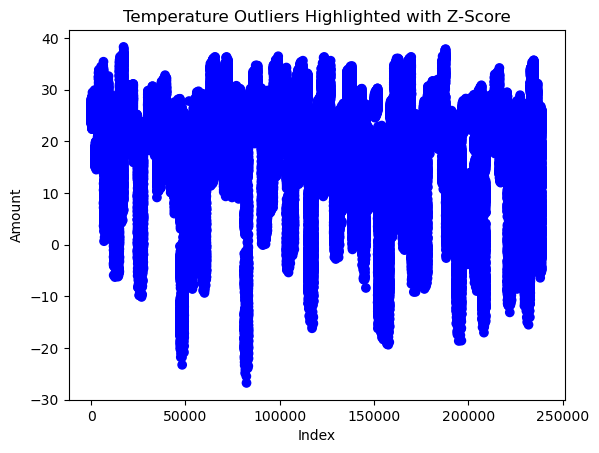

In [13]:
colours = ['red' if outlier else 'blue' for outlier in outlier_Temp_Amount]

plt.scatter(df_temperature.index, df_temperature['AverageTemperature'], c=colours)

plt.title('Temperature Outliers Highlighted with Z-Score')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.show()

In [14]:
zscores_Gas_Amount = zscore(df_gas['value'])
outlier_Gas_Amount = (zscores_Gas_Amount > 3) | (zscores_Gas_Amount < -3)
count_Gas_Outliers = outlier_Gas_Amount.sum()
print('There are', count_Gas_Outliers, 'outliers in the "value" column.')

There are 166 outliers in the "value" column.


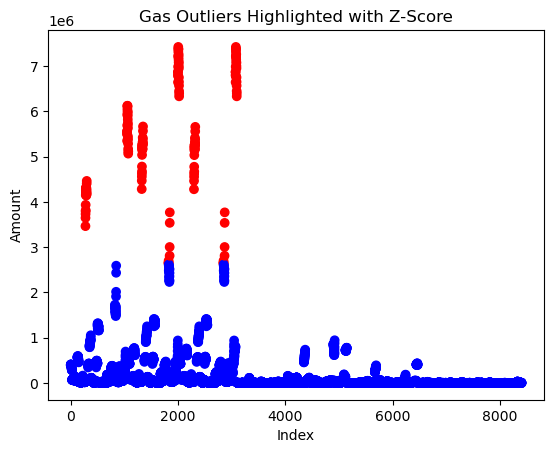

In [16]:
colours = ['red' if outlier else 'blue' for outlier in outlier_Gas_Amount]

plt.scatter(df_gas.index, df_gas['value'], c=colours)

plt.title('Gas Outliers Highlighted with Z-Score')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.show()

**IQR Method**

In [18]:
Q1_Temp = df_temperature['AverageTemperature'].quantile(0.25)
Q3_Temp = df_temperature['AverageTemperature'].quantile(0.75)
Q1_Gas = df_gas['value'].quantile(0.25)
Q3_Gas = df_gas['value'].quantile(0.75)

IQR_Temp = Q3_Temp - Q1_Temp
IQR_Gas = Q3_Gas - Q1_Gas

temp_Outliers_IQR = (df_temperature['AverageTemperature'] < Q1_Temp - 3 * IQR_Temp) | (df_temperature['AverageTemperature'] > Q3_Temp + 3 * IQR_Temp)
gas_Outliers_IQR = (df_gas['value'] < Q1_Gas - 3 * IQR_Gas) | (df_gas['value'] > Q3_Gas + 3 * IQR_Gas)

count_Temp_IQR_Outliers = temp_Outliers_IQR.sum()
count_Gas_IQR_outliers = gas_Outliers_IQR.sum()

print('There are', count_Temp_IQR_Outliers, 'outliers in the "AverageTemperature" column for the IQR method.')
print('There are', count_Gas_IQR_outliers, 'outliers in the "value" column for the IQR method.')

There are 0 outliers in the "AverageTemperature" column for the IQR method.
There are 1081 outliers in the "value" column for the IQR method.


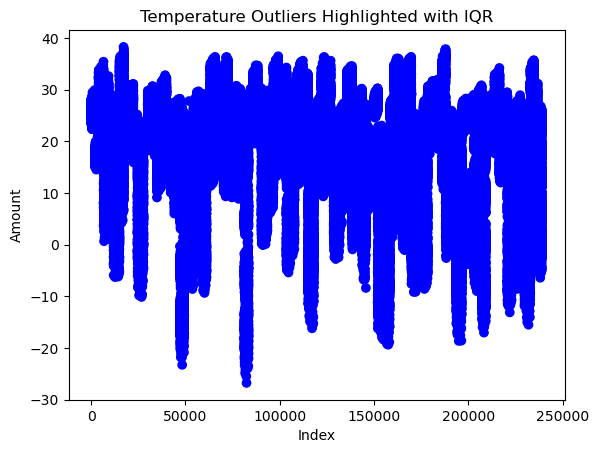

In [21]:
colours = ['red' if outlier else 'blue' for outlier in temp_Outliers_IQR]

plt.scatter(df_temperature.index, df_temperature['AverageTemperature'], c=colours)

plt.title('Temperature Outliers Highlighted with IQR')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.show()

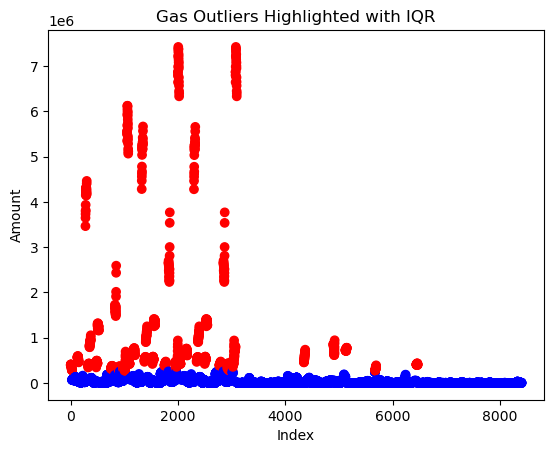

In [22]:
colours = ['red' if outlier else 'blue' for outlier in gas_Outliers_IQR]

plt.scatter(df_gas.index, df_gas['value'], c=colours)

plt.title('Gas Outliers Highlighted with IQR')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.show()

**Interpretation/Mitigation**

No outliers were found in the Global Land Temperatures dataframe for both detection methods.  The Greenhouse Gas dataframe had 166 and 1081 outliers found for the Z-score and the IQR method respectively.  Based on the domain of our project, we haved opted to leave these outliers in the dataset, as we beleive they are critical pieces of data.

<a id='2.b'></a>
<h3>"Descriptive header"...</h3>

"Descriptive description"...

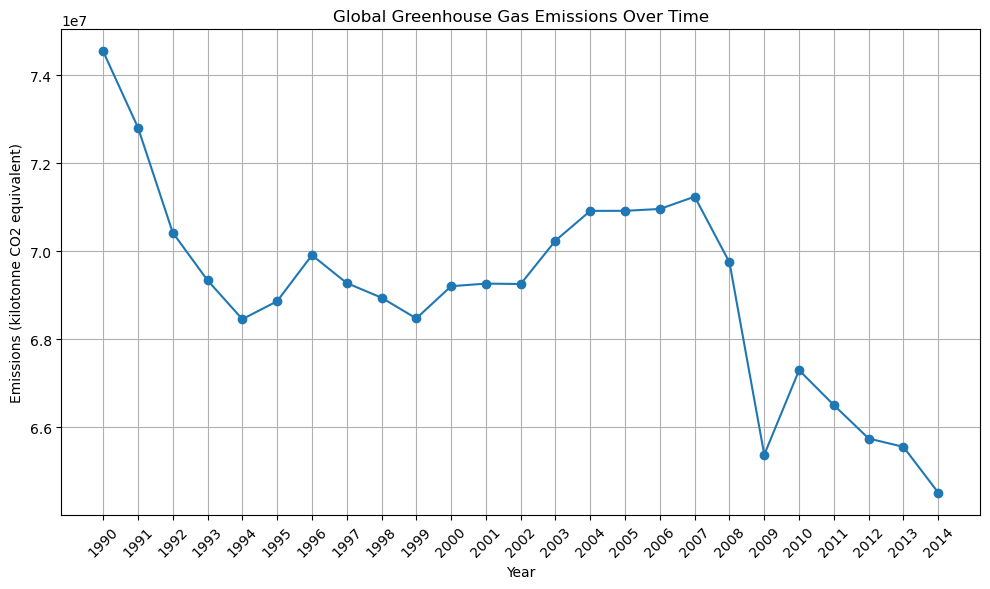

In [17]:
global_emissions = df_gas.groupby('year')['value'].sum()

plt.figure(figsize=(10, 6))
plt.plot(global_emissions.index, global_emissions.values, marker='o', linestyle='-')
plt.title('Global Greenhouse Gas Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions (kilotonne CO2 equivalent)')
plt.grid(True)
plt.xticks(global_emissions.index, rotation=45)
plt.tight_layout()
plt.show()

Maybe a visualization showing the countries with the highest increase overtime?